In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import sys
import os
import pythainlp
from pythainlp.corpus import stopwords
from datetime import datetime
import deepcut
# os.chdir(os.path.join(os.getcwd(), '../data/processed_except'))
os.getcwd()

'/Users/supakornbabe/Social_Networks_Data_Mining/Proj/py/Code'

In [172]:
def read_file(path):
    data = []
    file = open(path, "r")
    count = 0
    for line in file:
        try:
            if (line == '\n'):      # skip empty lines
                continue
            count = count + 1
            data.append(json.loads(line))
            if count % 100 == 0:
                sys.stdout.write('.')
            if count % 7000 == 0:
                sys.stdout.write('\n')
        except Exception as e:
            print(e)
            continue
    print(f"\n{count} line read.")
    df = pd.DataFrame.from_dict(data)
    return df



In [173]:
def count_word(df):
    words = {}
    count=0
    thai_symbols = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรลวศษสหฬอฮฤฦะัาำิีึืุูเแโใไๅ็่้๊๋ฯๆฺ์ํ๎๏๚๛๐๑๒๓๔๕๖๗๘๙฿'
    symbols = "!@#$%^&*()_+=-[]{}\|;:',./<>\"?1234567890qwertyuiopasdfghjklzxcvbnmQWERTYUIOPLKJHGFDSAZXCVBNM"
    thai_stopwords = stopwords.words('thai')
    for title in df['title']:
        count+=1
        print(str(count)+" " + title)
        for word in pythainlp.word_tokenize(title, engine='deepcut', whitespaces=False):
            if word in symbols:
                continue
            if word in thai_stopwords:
                continue
            if word in thai_symbols:
                continue
            if word not in words:
                print(word)
                words[word] = 1
            else:
                print(word)
                words[word] +=1
    dwords = pd.DataFrame(words.items(), columns=['Word', 'Count'])
    dwords.sort_values(by='Count',ascending=False,inplace=True)
    dwords=dwords[dwords.Word != 'quot']
    dwords=dwords[dwords.Word != '...']
    dwords=dwords[dwords.Word != 'นี้']
    dwords=dwords[dwords.Word != '##']
    dwords=dwords[dwords.Word != '###']
    dwords=dwords[dwords.Word != '####']
    dwords=dwords[dwords.Word != '#####']
    dwords.to_csv ('export_dataframe.csv', index = None, header=True)    
    return dwords

In [174]:
def get_word_count_list(df,start=0,stop=10):
    Counts = df.Count[start:stop]
    Counts = list(Counts)
    
    Words = df.Word[start:stop]
    Words = list(Words)
    return Words,Counts

def plot(x,y):
    print(x)
    print(y)

    width = 0.6
    fig, ax = plt.subplots()
    plt.bar(x, y, width, alpha=1, color='g')

    # Setting axis labels and ticks
    ax.set_ylabel('จำนวณ', fontsize=15)
    ax.set_title('คำที่อยู่ในหัวกระทู้', fontsize=15, fontweight='bold')
    ax.set_xticklabels(x,rotation=90)
    plt.grid()

    #set font
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Tahoma']

    # Figure size
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('word_in_title.png', dpi=80)


......................................................................
......................................................................
......................................................................
..................................................
26097 line read.
1 การเดินทางขึ้นดอยอินทนนท์และที่พักบนดอยอินทนนท์
เดินทาง
ดอยอินทนนท์
พัก
ดอยอินทนนท์
2 ทำพาสปอร์ตกี่วันได้
ทำ
พาสปอร์ต
กี่
3 ขั้นตอน วิธี เทคนิค การจองห้องพัก ให้ได้ราคาถูก (สำหรับมือใหม่) ด้วย AGODA
ขั้นตอน
วิธี
เทคนิค
จอง
ห้อง
พัก
ราคา
สำหรับ
มือ
AGODA
4 [CR] Japan...เท่าที่รู้ : Part ยาญี่ปุ่นและของกระจุกกระจิก
CR
Japan
...
รู้
Part
ยา
ญี่ปุ่น
กระจุกกระจิก
5 พรหมลิขิตเล่นตลก (18+)
พรหมลิขิต
เล่น
ตลก
18
6 [CR] ว่ายน้ำที่ร้านกาแฟกันค่ะ : after the rain coffee &amp; gallery สามพราน
CR
ว่าย
น้ำ
ร้าน
กาแฟ
after
the
rain
coffee
&amp
gallery
สามพราน
7 [CR] @@@  น้า Low Batt :: พาไปพัก AZISS Hotel    อ.เมือง   จ.พิษณุโลก   @@@
CR
@@@
น้า
Low
Batt
พัก
AZISS
Hotel
อ.เมือง
จ.พิษณุโลก
@@@
8 [CR] #วันเดียวเที่ยวนครฯ ::

CR
ศรีนวล ลอดจ์
Srinual
Lodge
เมืองน่าน
น่าน
quot
เงียบ
quot
83 Lost in Nikko , เมืองเหงาๆที่แสนอบอุ่น ☃
Lost
in
Nikko
เมือง
เหงา
แสน
อบอุ่น
☃
84 [CR] The Location Resort สวนผึ้ง
CR
The
Location
Resort
สวนผึ้ง
85 [CR] รวม 30 ร้านอาหารในตลาดโต้รุ่งหัวหิน มีอะไรขาย มีอะไรน่าทาน มาดูกันเลย by mukura
CR
30
ร้าน
อาหาร
ตลาดโต้รุ่งหัวหิน
ขาย
ทาน
ดู
by
mukura
86 [CR] ทริปสั้นๆ ในวันว่าง ขี่มอเตอร์ไซค์เที่ยวนครนายก
CR
ทริป
ว่าง
ขี่
มอเตอร์ไซค์
เที่ยวนครนายก
87 [CR] เนียนเป็นคุณแม่บ้านญี่ปุ่น  มาซ้อมแช่ onsen ที่ [ B A L C O N Y   C O U R T Y A R D ] ศรีราชา
CR
เนียน
แม่บ้าน
ญี่ปุ่น
ซ้อม
แช่
onsen
B A
N Y
R D
ศรีราชา
88 [CR] [CR]ราชบุรี...ไม่ได้มีดีแค่สวนผึ้ง
CR
CR
ราชบุรี
...
ดี
สวน
ผึ้ง
89 ใครเคยสอบสัมภาษณ์ออแพร์ไม่ผ่านมั้ง T-T
สอบ
สัมภาษณ์
ออแพร์
มั้ง
90 [CR] รีวิว &quot;ภูนกเงือกรีสอร์ท@กาญจนบุรี&quot; ที่คิดว่าจะประทับใจ แต่ไม่เลย
CR
รีวิว
quot
ภูนก
เงือก
รีสอร์ท@กาญจนบุรี
quot
ประทับใจ
91 พบกับรถ บขส. ม.1 ก VIP โฉมใหม่ 15 เมตร เร็วๆนี้!!!
รถ
บขส.
ม.
VIP
โฉม
15
เมตร
นี้
92 [CR] เที่ยว “อ่าง

เส้นทาง
PR
Australia
วิธี
ดี
partner
visa
skilled
visa
ดี
162 [CR] [CR]Review:: เที่ยวมาเก๊าเดี๋ยวเราบอก ตอนที่1.การเตรียมตัว
CR
CR
Review
เที่ยว
เก๊า
เดี๋ยว
ตอน
เตรียมตัว
163 ตอนนี้แจ้ง 90 วันทางอินเตอร์เน็ต ใช้ได้แล้วไหมคะ?
ตอน
นี้
แจ้ง
อินเตอร์เน็ต
ไหม
164 ใครมีวิธีกำจัดราบนผ้าบ้างคะ?
วิธี
กำจัด
ราบน
ผ้า
165 สอบถามโรงแรมในซัปโปโรค่ะ ผู้รู้ช่วยตอบทีนะค้า
สอบถาม
โรง
แรม
ซัปโปโร
รู้
ตอบ
ค้า
166 เวป accuweather พยากรณ์อากาศล่วงหน้าได้แม่นยำแค่ไหนคะ
เวป
accuweather
พยากรณ์
อากาศ
ล่วงหน้า
แม่นยำ
167 [CR] นั่งรถไฟ...ไปราชบุรี (เช้า•เย็น•กลับ) งบ500บาท ยังเหลือ
CR
นั่ง
รถไฟ
...
ราชบุรี
เช้า
•
เย็น
•
งบ
500
บาท
168 1 DAY TRIP ตะลอนให้ทั่วเกาะรัตนโกสินทร์ (ท่าเตียน-ท่าช้าง-ท่ามหาราช-ท่าวังหลัง(ศิริราช)-ท่าพระอาทิตย์)
DAY
TRIP
ตะลอน
เกาะ
รัตนโกสินทร์
ท่าเตียน
ท่าช้าง
ท่ามหาราช
ท่าวังหลัง
ศิริราช
ท่า
พระอาทิตย์
169 การเดินทางไป ห้าง สตรีท รัชดา
เดินทาง
ห้าง
สตรีท รัชดา
170 จากรังสิตไปนวนครไปยังไงคะ
รังสิต
นวนคร
171 น้ำมันสนเข็มแดงดีไหม
น้ำมัน
สน
เข็มแดง
ดี
ไหม
172 มีรถตู้ไปกลับฟิวเจอร์รังสิต-เด

สงสัย
grab
taxi
สำหรับ
คน
ขับ
Taxi
ชอบ
ลูกค้า
จ่าย
บัตร
เครดิต
ไหม
239 [CR] โตเกียว คนเดียวก็เที่ยวได้  PART 1 : Shinjuku
CR
โตเกียว
คน
เที่ยว
PART
Shinjuku
240 ตม.กัวลาลัมเปอร์ มาเลเซีย
ตม.
กัวลาลัมเปอร์
มาเลเซีย
241 ฝรั่งอึ้ง! ใช้ LIDAR Scans นครวัด ของเขมร ยังมีอาณาจักรใหญ่โตซ่อนอยู่ด้านล่าง
ฝรั่ง
อึ้ง
LIDAR
Scans
นครวัด
เขมร
อาณาจักร
ซ่อน
ล่าง
242 [CR] พี่ม้าพาเที่ยว 10 สิ่งที่อยากให้ซื้อในร้านขายยาญี่ปุ่น  ของดีไม่ได้มีแต่เครื่องสำอาง เดี๋ยวจะตะเตือนไต
CR
พี่ม้า
เที่ยว
10
ซื้อ
ร้าน
ขาย
ยา
ญี่ปุ่น
ดี
เครื่อง
สำอาง
เดี๋ยว
ตะเตือน
ไต
243 จากหน้ารามไปอิมแพค มีรถตู้ไหมค่ะ ต้องขึ้นตรงไหนฝั่งไหนคะ?
หน้า
ราม
อิมแพค
รถ
ตู้
ไหม
ฝั่ง
244 ใครพอทราบคิวรถตู้จากระยองไปเกาะล้านหรือพัทยาบ้างครับ
ทราบ
คิว
รถ
ตู้
ระยอง
เกาะ
ล้าน
พัทยา
245 ภาษาอังกฤษเพื่อการสื่อสารสากล เรียนเกี่ยวกับอะไร
ภาษา
อังกฤษ
สื่อสาร
สากล
เรียน
เกี่ยว
246 [CR] &quot; ภู เ ก็ ต &quot; ใครว่าแพง อาหารทะเลถูกๆก็มี
CR
quot
ภู เ
quot
แพง
อาหาร
ทะเล
247 Shirakawago ช่วงมกราคม
Shirakawago
มกราคม
248 Cruise  ไป   Bahamas ต้องขอวีซ่ามั

รีวิว
แอ่วเชียงใหม่
พัก
2 Mountain
Pano
Residence
Chiang
Mai
ราคา
หลัก
ร้อย
ชิววว
นิมมานเหมินทร์
315 เดินกินลม...ชมกาดกองเก่า...ถนนคนเดินเมืองแพร่
เดิน
กินลม
...
ชม
กาด
กองเก่า
...
ถนน
คน
เดินเมือง
แพร่
316 ไปญี่ปุ่นช่วงไหนที่สามารถเล่นหิมะและชมซากุระได้คะ
ญี่ปุ่น
เล่น
หิมะ
ชมซากุระ
317 การใช้หนังสือรับรองบริษัทขอวีซ่าเดินทางไปต่างประเทศ
หนังสือ
บริษัท
ขอวีซ่า
เดินทาง
ประเทศ
318 [CR] ทริปเล็กๆ ขับรถเล่นชิล ชิล หาที่เล่นน้ำแก่งกระจาน
CR
ทริป
ขับ
รถ
เล่น
ชิล ชิล
หา
เล่น
น้ำ
แก่ง
กระจาน
319 ตั๋ว USJ ซื้อที่ไหนถูกที่สุดครับ
ตั๋ว
USJ
ซื้อ
320 การถ่ายภาพ 360 องศาลง Facebook อย่างง่ายๆ ทั้ง Android และ iOS
ถ่าย
ภาพ
360
อง
ศา
Facebook
Android
iOS
321 ที่พักใกล้ท่าแพเดินไปถนนคนเดินสามารถเดินไปได้ค่ะ
พัก
ท่า
แพ
เดิน
ถนน
คน
เดิน
เดิน
322 [CR] กวม (GUAM) - เกาะเล็ก ที่รวมทริปมัลดีฟ และเมกาไว้ที่เดียวกัน
CR
กวม
GUAM
เกาะเล็ก
ทริปมัลดีฟ
เมกา
323 เรือข้ามฟาก เกาะสมุย-เกาะพงั้น / เกาะพงัน-สุราษฏ์ #ราคาถูกๆๆ
เรือ
ข้ามฟาก
เกาะสมุย
เกาะพงั้น
เกาะพงัน
สุราษฏ์
#ราคา
324 [CR] รีวิว &quot;แมริออท ระยอง&quot;

Statement
ย้อนหลัง
SCB
สำเนา
Bookbank
ไหม
ตัว
399 จะไป paseo park กาญจนาภิเษก ต้องนั่งอะไร
paseo park
กาญจนาภิเษก
นั่ง
400 ซื้อcharles &amp; keith และ Nike ที่ลดมากๆ ที่สิงค์โปรที่ไหนได้บ้างคะ?
ซื้อ
charles
&amp;
keith
Nike
ลด
สิงค์
โปร
401 จองตั๋วรถไฟรัสเซีย
จอง
ตั๋ว
รถไฟ
รัสเซีย
['CR', 'เที่ยว', 'ดี', 'รีวิว', 'รถ', 'เดินทาง', 'ไหม', 'ซื้อ', 'พัก', 'สอบถาม', 'น้ำ', 'คน', 'สาย', 'นั่ง', 'คืน', 'ร้าน', 'หน้า', 'ราคา', 'วิธี', 'SR', 'ทำ', 'ไทย', 'ตัว', 'บิน', 'เครื่อง', 'กิน', 'ตั๋ว', 'ทะเล', 'เมือง', 'ประเทศ']
[143, 51, 33, 31, 31, 21, 21, 20, 19, 19, 18, 18, 15, 14, 14, 14, 14, 13, 13, 13, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10]


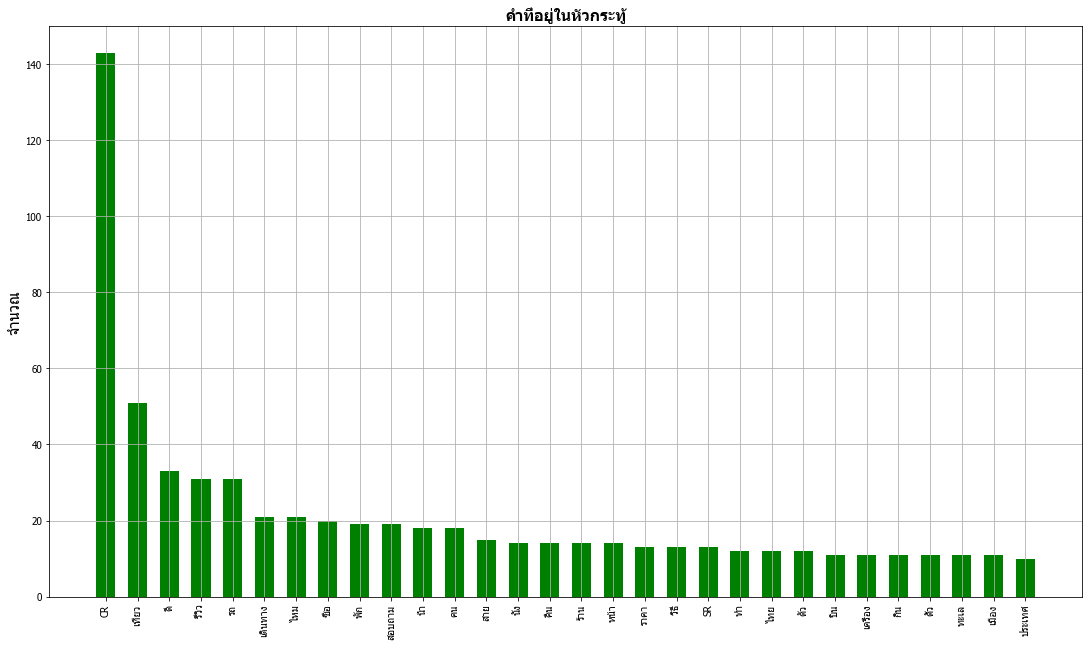

In [175]:
df = read_file('topic.json')
df.date = pd.to_datetime(df.date)
mask = (df['date'] > '2016-06-01') & (df['date'] <= '2016-06-30')
test = df.loc[mask]
ans = count_word(test)
ans.head()
x,y = get_word_count_list(df = ans,stop=30)    
plot(x,y)